In [0]:
# gamma correction

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_name = 'OutsideView'
img = cv2.imread(str(img_name) + ".bmp")

# split image into BGR components and rescaling
blue, green, red = cv2.split(img)
blue = blue/255.0
green = green/255.0
red = red/255.0
# set gamma value
gamma = 2.2

# perform gamma correction on images and undo rescaling
gamma_blue = np.power(blue, (1/gamma))*255
gamma_green = np.power(green, (1/gamma))*255
gamma_red = np.power(red, (1/gamma))*255

# merge BGR channels together and saving image
gamma_img = cv2.merge([gamma_blue, gamma_green, gamma_red])
output_img = str(img_name) + "_gamma_" + str(gamma) + ".bmp"
cv2.imwrite(output_img, gamma_img)

True

In [0]:
# histogram equalization

In [11]:
import cv2
import numpy as np

img_name = 'OutsideView'
img = cv2.imread(str(img_name) + ".bmp")

# split image into BGR components and rescaling
blue, green, red = cv2.split(img)
# blue = blue/255.0
# green = green/255.0
# red = red/255.0

def image_histogram_equalization(image, number_bins=256):   
  # get image histogram
  image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
  # cumulative distribution function
  cdf = image_histogram.cumsum() 
  # normalize
  cdf = 255 * cdf / cdf[-1]
  # use linear interpolation of cdf to find new pixel values
  image_equalized = np.interp(image.flatten(), bins[:-1], cdf).astype('uint8')
  image_equalized = image_equalized.reshape((image.shape))
  return image_equalized

hist_blue = image_histogram_equalization(blue)
hist_green = image_histogram_equalization(green)
hist_red = image_histogram_equalization(red)

# merge BGR channels together and saving image
hist_img = cv2.merge([hist_blue, hist_green, hist_red])
output_img = str(img_name) + "_histogram"  + ".bmp"
cv2.imwrite(output_img, hist_img)

True

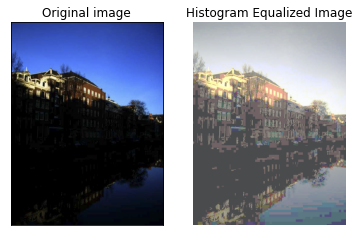

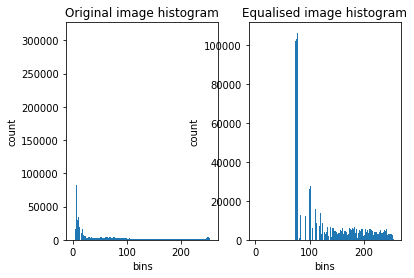

In [0]:
# plotting histogram and showing comparison
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(121)
plt.title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.title('Histogram Equalized Image')
plt.imshow(cv2.cvtColor(hist_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.figure(2)
plt.subplot(121)
plt.title('Original image histogram')
plt.hist(img.flatten(),256,[0,256],linewidth=1.0);
plt.xlabel('bins'), plt.ylabel('count')
plt.subplot(122)
plt.title('Equalised image histogram')
plt.hist(hist_img.flatten(),256,[0,256],linewidth=1.0);
plt.xlabel('bins'), plt.ylabel('count')
plt.show()

In [0]:
# YCbCr image format

In [29]:
import numpy as np
import cv2

img_name = 'OutsideView'
img = cv2.imread(str(img_name) + ".bmp")

# split image into BGR components and rescaling
blue, green, red = cv2.split(img)

# convert image to YCbCr format
def ycc(red, green, blue):
  y = (0.299 * red) +  (0.587 * green) + (0.114 * blue) + 0
  cb = (-0.168736 * red) +  (-0.331264 * green) + (0.5 * blue) + 128
  cr = (0.5 * red) +  (-0.418688 * green) + (-0.081312 * blue) + 128
  return y, cb, cr

# reverse conversion
def rgb(y, cb, cr):
  ycc_red = y + 1.402 * (cr-128)
  ycc_green = y - 0.344136 * (cb-128) -  0.714136 * (cr-128)
  ycc_blue = y + 1.772 * (cb-128)
  return ycc_red, ycc_green, ycc_blue

# convert to YCbCr format
y, cb, cr = ycc(red, green, blue)

# perform histogram equalization on Y channel
y = image_histogram_equalization(y)

# obtain RGB values by inverse YCbCr
ycc_red, ycc_green, ycc_blue = rgb(y, cb, cr)

# merge images together and saving image
ycc_img = cv2.merge([ycc_blue, ycc_green, ycc_red])
output_img = str(img_name) + "_ycc"  + ".bmp"
cv2.imwrite(output_img, ycc_img)

True